# 多层神经网络，Sequential 和 Module
通过前面的章节，我们了解到了机器学习领域中最常见的两个模型，线性回归模型和 Logistic 回归模型，他们分别是处理机器学习中最常见的两类问题-回归问题和分类问题。

下面我们会讲第一个深度学习的模型，多层神经网络。

## 多层神经网络
在前面的线性回归中，我们的公式是 $y = w x + b$，而在 Logistic 回归中，我们的公式是 $y = Sigmoid(w x + b)$，其实它们都可以看成单层神经网络，其中 Sigmoid 被称为激活函数，之后我们会详细介绍激活函数以及为什么必须使用激活函数，下面我们从理解神经网络入手。

### 理解神经网络
神经网络的灵感来自于人脑的神经元系统，下面我们放一张人脑的神经元和神经网络的对比图(来自 cs231n)

![](https://ws4.sinaimg.cn/large/006tNc79ly1fmgiz5mqs3j30or0773zg.jpg)

左边是一张神经元的图片，神经元通过突触接受输入，然后通过**神经激活**的方式传输给后面的神经元。这对比于右边的神经网络，首先接受数据输入，然后通过计算得到结果，接着经过**激活函数**，再传给第二层的神经元。

所以前面讲的 logistic 回归模型和线性回归模型都可以看做是一个单层神经网络，而 logistic 回归中使用了激活函数 sigmoid。

神经网络使用的激活函数都是非线性的，每个激活函数都输入一个值，然后做一种特定的数学运算得到一个结果，下面举几个例子

sigmoid 激活函数

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![](https://ws1.sinaimg.cn/large/006tNc79ly1fmgj7yto7gj308w05oa9w.jpg)

tanh 激活函数

$$tanh(x) = 2 \sigma(2x) - 1$$

![](https://ws3.sinaimg.cn/large/006tNc79ly1fmgj8yjdnlj308w05mt8j.jpg)

ReLU 激活函数

$$ReLU(x) = max(0, x)$$

![](https://ws1.sinaimg.cn/large/006tNc79ly1fmgj94ky2oj308n05uq2r.jpg)

我们下面重点讲一讲 ReLU 激活函数，因为现在神经网络中 90% 的情况都是使用这个激活函数。一般一个一层的神经网络的公式就是 $y = max(0, w x + b)$，一个两层的神经网络就是 $y = w_2\ max(0, w_1 x + b_1) + b_2$，非常简单，但是却很有效，使用这个激活函数能够加快梯度下降法的收敛速度，同时对比与其他的激活函数，这个激活函数计算更加简单，所以现在变得非常流行，之后你会发现我们几乎在所有的神经网络中都会使用它。

## 神经网络的结构
神经网络就是很多个神经元堆在一起形成一层神经网络，那么多个层堆叠在一起就是深层神经网络，我们可以通过下面的图展示一个两层的神经网络和三层的神经网络

![](https://ws2.sinaimg.cn/large/006tNc79ly1fmgjiafmmjj30nu07075w.jpg)

可以看到，神经网络的结构其实非常简单，主要有输入层，隐藏层，输出层构成，输入层需要根据特征数目来决定，输出层根据解决的问题来决定，那么隐藏层的网路层数以及每层的神经元数就是可以调节的参数，而不同的层数和每层的参数对模型的影响非常大，我们看看这个网站的 [demo](http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)

神经网络向前传播也非常简单，就是一层一层不断做运算就可以了，可以看看下面这个例子

![](https://ws2.sinaimg.cn/large/006tNc79ly1fmgj4q1j78g309u0cc4qq.gif)

## 为什么要使用激活函数
激活函数在神经网络中非常重要，使用激活函数也是非常必要的，前面我们从人脑神经元的角度理解了激活函数，因为神经元需要通过激活才能往后传播，所以神经网络中需要激活函数，下面我们从数学的角度理解一下激活函数的必要性。

比如一个两层的神经网络，使用 A 表示激活函数，那么

$$
y = w_2 A(w_1 x)
$$

如果我们不使用激活函数，那么神经网络的结果就是

$$
y = w_2 (w_1 x) = (w_2 w_1) x = \bar{w} x
$$

可以看到，我们将两层神经网络的参数合在一起，用 $\bar{w}$ 来表示，两层的神经网络其实就变成了一层神经网络，只不过参数变成了新的 $\bar{w}$，所以如果不使用激活函数，那么不管多少层的神经网络，$y = w_n \cdots w_2 w_1 x = \bar{w} x$，就都变成了单层神经网络，所以在每一层我们都必须使用激活函数。

最后我们看看激活函数对神经网络的影响

![](https://ws1.sinaimg.cn/large/006tNc79ly1fmgkeqjr34g306r065diu.gif)

可以看到使用了激活函数之后，神经网络可以通过改变权重实现任意形状，越是复杂的神经网络能拟合的形状越复杂，这就是著名的神经网络万有逼近定理。

下面我们通过例子来感受一下神经网络的强大之处

In [7]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 测试：meshgrid(a,b)，跟a,b原本是行列向量无关；会把a拷贝len(b)行，把b拷贝len(a)列
np.meshgrid(np.arange(1, 10, 1).reshape(1, 9), np.arange(10, 20, 2))
# np.meshgrid(np.arange(1, 10, 1).reshape(1, 9), np.arange(10, 20, 2))

[array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 10, 10, 10, 10, 10, 10, 10, 10],
        [12, 12, 12, 12, 12, 12, 12, 12, 12],
        [14, 14, 14, 14, 14, 14, 14, 14, 14],
        [16, 16, 16, 16, 16, 16, 16, 16, 16],
        [18, 18, 18, 18, 18, 18, 18, 18, 18]])]

In [9]:
# 测试：a, b一般要指明矩阵维度，否则矩阵乘法会出错，或不是预期的结果
a, b = torch.Tensor([1, 2]), torch.Tensor([3, 4])
print(torch.mm(a.reshape(1, 2), b.reshape(2, 1)))
print(torch.mm(a.reshape(2, 1), b.reshape(1, 2)))

tensor([[11.]])
tensor([[3., 4.],
        [6., 8.]])


In [10]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

这次我们仍然处理一个二分类问题，但是比前面的 logistic 回归更加复杂

In [23]:
np.random.seed(1)
m = 400 # 总共点数（样本数量）
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4  # 极径长度

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

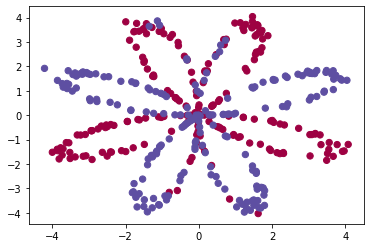

In [24]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [ ]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

我们可以先尝试用 logistic 回归来解决这个问题

In [35]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

TypeError: expected np.ndarray (got Tensor)

In [36]:
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

optimizer = torch.optim.SGD([w, b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

In [37]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 20, loss: 0.6961395144462585
epoch: 40, loss: 0.6738598346710205
epoch: 60, loss: 0.6731659173965454
epoch: 80, loss: 0.6731477379798889
epoch: 100, loss: 0.6731464266777039


In [40]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = torch.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5, 1.0, 'logistic regression')

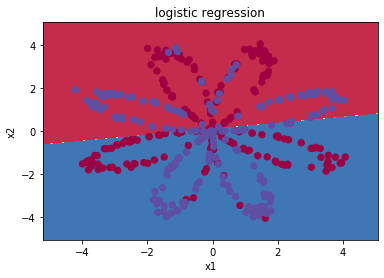

In [41]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

可以看到，logistic 回归并不能很好的区分开这个复杂的数据集，如果你还记得前面的内容，你就知道 logistic 回归是一个线性分类器，这个时候就该我们的神经网络登场了！

In [44]:
# 定义两层神经网络的参数
w1 = nn.Parameter(torch.randn(2, 4) * 0.01) # 隐藏层神经元个数 2
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

# 定义模型
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = torch.tanh(x1) # 使用 PyTorch 自带的 tanh 激活函数
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)

criterion = nn.BCEWithLogitsLoss()

In [46]:
# 我们训练 10000 次
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.2723331153392792
epoch: 2000, loss: 0.2651524841785431
epoch: 3000, loss: 0.2602995038032532
epoch: 4000, loss: 0.25684529542922974
epoch: 5000, loss: 0.25429245829582214
epoch: 6000, loss: 0.2523435056209564
epoch: 7000, loss: 0.2508145272731781
epoch: 8000, loss: 0.24958735704421997
epoch: 9000, loss: 0.24858327209949493
epoch: 10000, loss: 0.24774807691574097


In [47]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5, 1.0, '2 layer network')

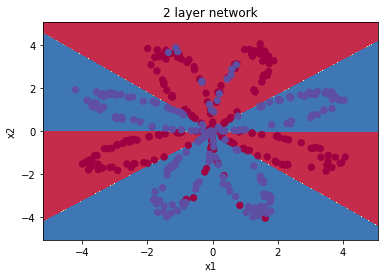

In [48]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

可以看到神经网络能够非常好地分类这个复杂的数据，和前面的 logistic 回归相比，神经网络因为有了激活函数的存在，成了一个非线性分类器，所以神经网络分类的边界更加复杂。

## Sequential 和 Module

我们讲了数据处理，模型构建，loss 函数设计等等内容，但是目前为止我们还没有准备好构建一个完整的机器学习系统，一个完整的机器学习系统需要我们不断地读写模型。在现实应用中，一般我们会将模型在本地进行训练，然后保存模型，接着我们会将模型部署到不同的地方进行应用，所以在这节课我们会教大家如何保存 PyTorch 的模型。

首先我们会讲一下 PyTorch 中的模块，Sequential 和 Module。


对于前面的线性回归模型、 Logistic回归模型和神经网络，我们在构建的时候定义了需要的参数。这对于比较小的模型是可行的，但是对于大的模型，比如100 层的神经网络，这个时候再去手动定义参数就显得非常麻烦，所以 PyTorch 提供了两个模块来帮助我们构建模型，一个是Sequential，一个是 Module。

Sequential 允许我们构建序列化的模块，而 Module 是一种更加灵活的模型定义方式，我们下面分别用 Sequential 和 Module 来定义上面的神经网络。

In [49]:
# Sequential
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch 中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [50]:
# 序列模块可以通过索引访问每一层

seq_net[0] # 第一层

Linear(in_features=2, out_features=4, bias=True)

In [51]:
# 打印出第一层的权重

w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[ 0.5742, -0.3222],
        [-0.6332, -0.5933],
        [ 0.3577, -0.0564],
        [-0.6468,  0.6093]], requires_grad=True)


In [53]:
# 通过 parameters 可以取得模型的参数
param = seq_net.parameters()

# 定义优化器
optim = torch.optim.SGD(param, 1.)

In [55]:
# 我们训练 10000 次
for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.2460910677909851
epoch: 2000, loss: 0.23480111360549927
epoch: 3000, loss: 0.22878597676753998
epoch: 4000, loss: 0.22477257251739502
epoch: 5000, loss: 0.22181297838687897
epoch: 6000, loss: 0.21950168907642365
epoch: 7000, loss: 0.2176344096660614
epoch: 8000, loss: 0.21609735488891602
epoch: 9000, loss: 0.2148147076368332
epoch: 10000, loss: 0.21373161673545837


可以看到，训练 10000 次 loss 比之前的更低，这是因为 PyTorch 自带的模块比我们写的更加稳定，同时也有一些初始化的问题在里面，关于参数初始化，我们会在后面的课程中讲到

In [56]:
def plot_seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

Text(0.5, 1.0, 'sequential')

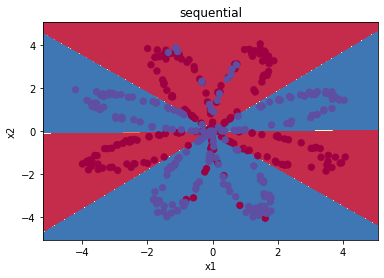

In [57]:
plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')

最后我们讲一讲如何保存模型，保存模型在 PyTorch 中有两种方式，一种是将模型结构和参数都保存在一起，一种是只将参数保存下来，下面我们一一介绍。

In [58]:
# 将参数和模型保存在一起
torch.save(seq_net, 'save_seq_net.pth')

上面就是保存模型的方式，`torch.save`里面有两个参数，第一个是要保存的模型，第二个参数是保存的路径，读取模型的方式也非常简单

In [59]:
# 读取保存的模型
seq_net1 = torch.load('save_seq_net.pth')

In [60]:
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [61]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[  8.8488,  -9.8112],
        [-11.0285, -12.9785],
        [  0.1721,  -9.4009],
        [-11.0186,   3.3171]], requires_grad=True)


我们可以看到我们重新读入了模型，并且将其命名为 seq_net1，并且打印了第一层的参数

下面我们看看第二种保存模型的方式，只保存参数而不保存模型结构

In [62]:
# 保存模型参数
torch.save(seq_net.state_dict(), 'save_seq_net_params.pth')

通过上面的方式，我们保存了模型的参数，如果要重新读入模型的参数，首先我们需要重新定义一次模型，接着重新读入参数

In [63]:
seq_net2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

seq_net2.load_state_dict(torch.load('save_seq_net_params.pth'))

<All keys matched successfully>

In [64]:
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [65]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[  8.8488,  -9.8112],
        [-11.0285, -12.9785],
        [  0.1721,  -9.4009],
        [-11.0186,   3.3171]], requires_grad=True)


通过这种方式我们也重新读入了相同的模型，打印第一层的参数对比，发现和前面的办法是一样

有这两种保存和读取模型的方法，我们推荐使用**第二种**，因为第二种可移植性更强

下面我们再用 Module 定义这个模型，下面是使用 Module 的模板

```
class 网络名字(nn.Module):
    def __init__(self, 一些定义的参数):
        super(网络名字, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        self.layer2 = nn.Sequential(...)
        ...
        
        定义需要用的网络层
        
    def forward(self, x): # 定义前向传播
        x1 = self.layer1(x)
        x2 = self.layer2(x)
        x = x1 + x2
        ...
        return x
```

注意的是，Module 里面也可以使用 Sequential，同时 Module 非常灵活，具体体现在 forward 中，如何复杂的操作都能直观的在 forward 里面执行

下面我们照着模板实现一下上面的神经网络

In [66]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        
        self.layer2 = nn.Tanh()
        
        self.layer3 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [67]:
mo_net = module_net(2, 4, 1)

In [68]:
# 访问模型中的某层可以直接通过名字

# 第一层
l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [69]:
# 打印出第一层的权重
print(l1.weight)

Parameter containing:
tensor([[ 0.3391, -0.6816],
        [ 0.5686,  0.4296],
        [-0.5771,  0.6664],
        [-0.2270, -0.6154]], requires_grad=True)


In [70]:
# 定义优化器
optim = torch.optim.SGD(mo_net.parameters(), 1.)

In [72]:
# 我们训练 10000 次
for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.27682459354400635
epoch: 2000, loss: 0.2696022391319275
epoch: 3000, loss: 0.2649027407169342
epoch: 4000, loss: 0.2615937888622284
epoch: 5000, loss: 0.2591480612754822
epoch: 6000, loss: 0.257274866104126
epoch: 7000, loss: 0.25579917430877686
epoch: 8000, loss: 0.25460925698280334
epoch: 9000, loss: 0.2536303997039795
epoch: 10000, loss: 0.2528109848499298


In [73]:
# 保存模型
torch.save(mo_net.state_dict(), 'module_net.pth')

可以看到我们得到了相同的结果，而且使用 Sequential 和 Module 来定义模型更加方便

在这一节中我们还是使用梯度下降法来优化参数，在神经网络中，这种优化方法有一个特别的名字，反向传播算法，下一次课我们会讲一讲什么是反向传播算法

**小练习：改变网络的隐藏层神经元数目，或者试试定义一个 5 层甚至更深的模型，增加训练次数，改变学习率，看看结果会怎么样**

下面举个例子

In [74]:
net = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
)

optim = torch.optim.SGD(net.parameters(), 0.1)

In [76]:
# 我们训练 20000 次
for e in range(20000):
    out = net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.24042430520057678
epoch: 2000, loss: 0.21782658994197845
epoch: 3000, loss: 0.20478175580501556
epoch: 4000, loss: 0.1957954466342926
epoch: 5000, loss: 0.18949666619300842
epoch: 6000, loss: 0.18479230999946594
epoch: 7000, loss: 0.18089771270751953
epoch: 8000, loss: 0.1773533821105957
epoch: 9000, loss: 0.1741107702255249
epoch: 10000, loss: 0.1714107096195221
epoch: 11000, loss: 0.16919662058353424
epoch: 12000, loss: 0.16718964278697968
epoch: 13000, loss: 0.16521169245243073
epoch: 14000, loss: 0.1632399559020996
epoch: 15000, loss: 0.16130711138248444
epoch: 16000, loss: 0.15943869948387146
epoch: 17000, loss: 0.15764322876930237
epoch: 18000, loss: 0.15591977536678314
epoch: 19000, loss: 0.15426316857337952
epoch: 20000, loss: 0.1526528000831604


Text(0.5, 1.0, 'sequential')

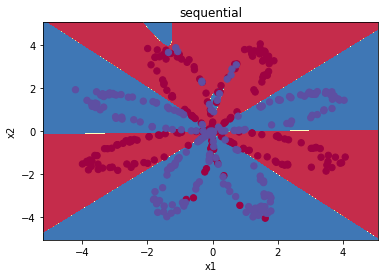

In [77]:
def plot_net(x):
    out = F.sigmoid(net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

plot_decision_boundary(lambda x: plot_net(x), x.numpy(), y.numpy())
plt.title('sequential')